In [1]:
from utils.configuration import get_config_from_json
from utils.training_utilities import set_GPU
from utils.plotting_traces import plot_traces
from seq2point.seq2point import SEQ2POINT
from dataset_management.dataloader import Seq2PointDataLoader
import builtins

In [2]:
builtins.MODEL_CONFIG = get_config_from_json(description="Model Parameters", config_file="configs/model_config.json")
builtins.DATASET_CONFIG = get_config_from_json(description="Dataset Management", config_file="configs/dataset_config.json")
builtins.PLOT_CONFIG = get_config_from_json(description="Plot Settings", config_file="configs/plot_config.json")
builtins.TRAINING_CONFIG = get_config_from_json(description="Training Configuration", config_file="configs/training_config.json")

In [3]:
TRAINING_CONFIG['EXPERIMENT_PATH'] = f'experiments/{TRAINING_CONFIG["TARGET_APPLIANCE"]}/{TRAINING_CONFIG["TARGET_HOUSES"]["TRAIN"]}/'

In [4]:
dataloaders = Seq2PointDataLoader(
    target_appliance=TRAINING_CONFIG['TARGET_APPLIANCE'], 
    target_houses= TRAINING_CONFIG['TARGET_HOUSES'], 
    proportion = TRAINING_CONFIG['SPLIT_PROPORTION'], 
    subset_days = TRAINING_CONFIG['SUBSET_DAYS'],
    # scalers_directory = TRAINING_CONFIG['EXPERIMENT_PATH'],
    # normalize_with=TRAINING_CONFIG['NORMALIZE']
)

Followings are the refit_loader configuration 
{'DATA_FOLDER': 'data/refit/', 'DATA_TYPE': '.csv', 'README_FILE': 'refit_loader/REFIT_Readme.txt', 'REFIT_HOUSES': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]}

Loading specified buildings: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]
Parsing the readme file specified: refit_loader/REFIT_Readme.txt
Loading data for appliance KETTLE ...
Fetching KETTLE data for House 2
Resampling for house number:  2
Updating data with resampled dataset...
Subetting dataset with 10 days of most activities for House 2
Estimating active durations of: kettle
Updating data with selected active appliance activities...
Updating splits with specified proportion from every target house...

Creating dataloaders...
Data Loaders are successfully initialized.


In [5]:
network = SEQ2POINT().to(set_GPU())
results = network.run(dataloaders.train_dataloader, dataloaders.validation_dataloader, assess_training=True)


Initializing SEQ2POINT model archiecture

Followings are the Model Parameters of your network architecture..
{'CONV_KERNEL': [10, 8, 6, 5, 5],
 'CONV_LAYERS': 5,
 'CONV_PADDING': 0,
 'CONV_STRIDE': 1,
 'DESCRIPTION': 'Model Parameters',
 'INPUT_CHANNELS': [1, 30, 30, 40, 50],
 'LEFT_PAD': [4, 3, 2, 2, 2],
 'LINEAR_INPUT': [29950, 1024],
 'LINEAR_LAYERS': 2,
 'LINEAR_OUTPUT': [1024, 1],
 'OUTPUT_CHANNELS': [30, 30, 40, 50, 50],
 'POOL_KERNEL': [],
 'POOL_STRIDE': [],
 'RIGHT_PAD': [5, 4, 3, 2, 2],
 'SEQUENCE_LENGTH': 599}

SEQ2POINT model archiecture has been initialized.


Followings are the Training Configuration of your experiment..
{'DESCRIPTION': 'Training Configuration',
 'EARLY_STOPPING_THRESHOLD': 5,
 'EXPERIMENT_PATH': 'experiments/KETTLE/[2]/',
 'LEARNING_RATE': 0.001,
 'LOSS': 'nn.MSELoss',
 'LOSS_REDUCTION': 'mean',
 'NORMALIZE': 'Standard',
 'NUM_EPOCHS': 10,
 'OPTIMIZER': 'optim.Adam',
 'PRE_TRAINED_MODEL_FLAG': False,
 'SPLIT_PROPORTION': {'TEST_PERCENT': 0.2,
          

Saving the Training Loss vs Validation Loss plot...



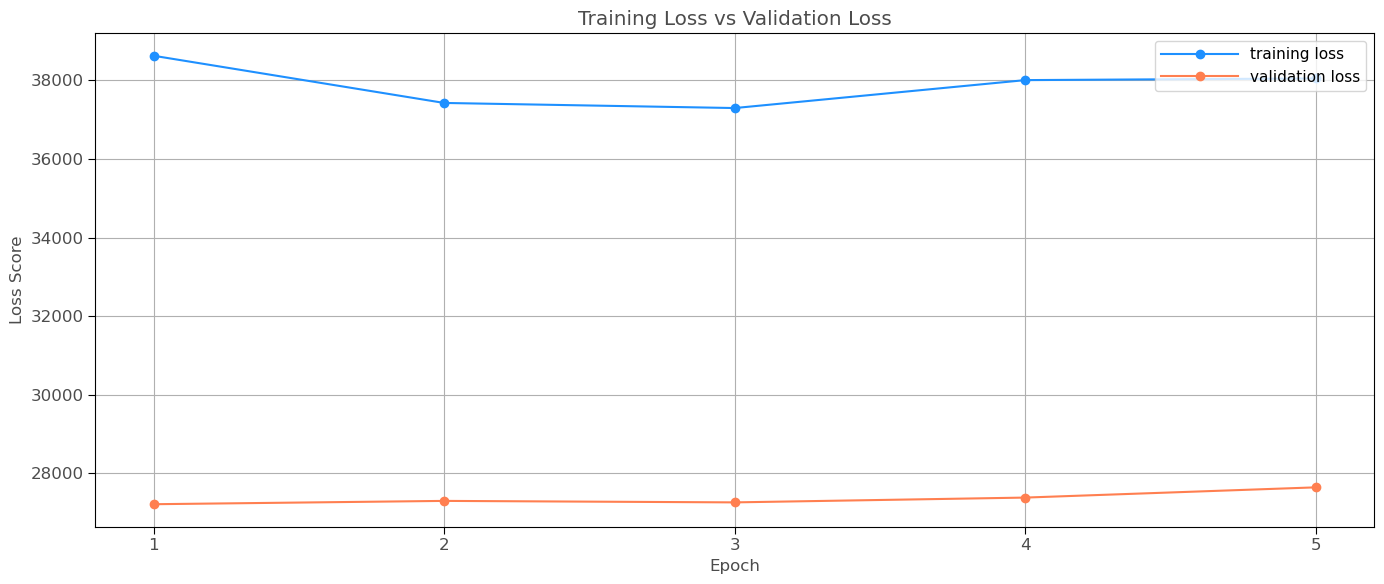

In [6]:
plot_traces(traces=[results[0], results[1]], labels = ['training loss', 'validation loss'], axis_labels=['Epoch', 'Loss Score'] , title="Training Loss vs Validation Loss")

Saving the Recall vs Precision per Epoch plot...



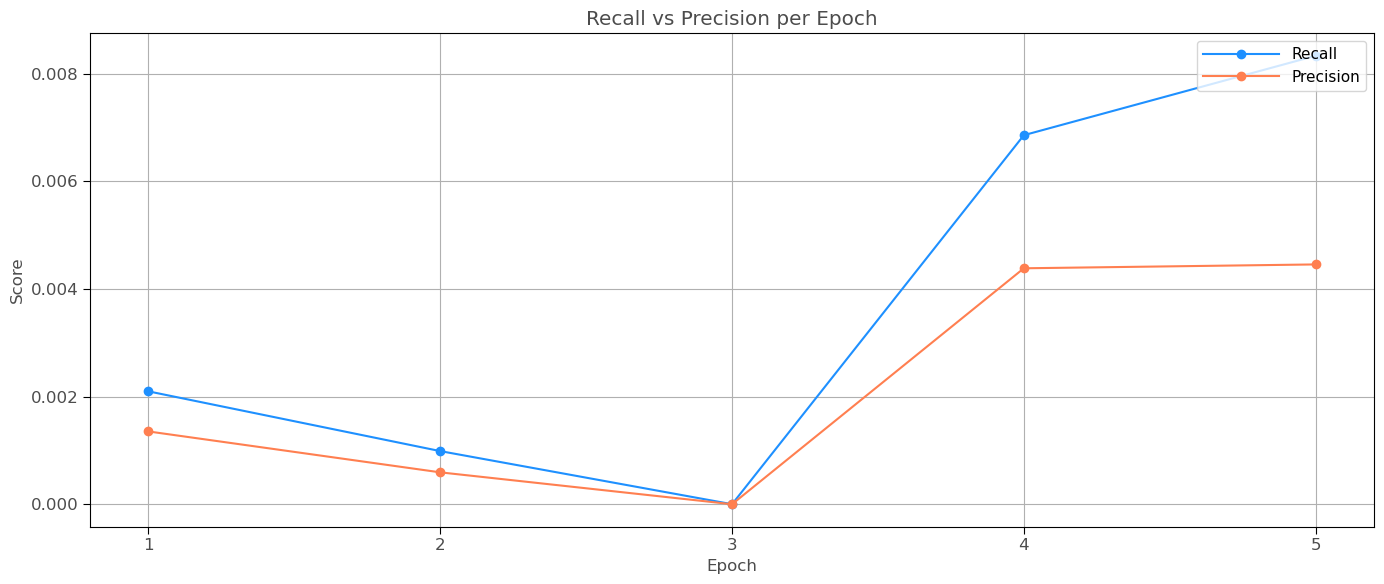

In [10]:
plot_traces(traces=[results[2], results[3]], labels = ['Recall', 'Precision'], axis_labels=['Epoch', 'Score'] , title="Recall vs Precision per Epoch")

In [11]:
test_network = SEQ2POINT().to(set_GPU())


Initializing SEQ2POINT model archiecture

Followings are the Model Parameters of your network architecture..
{'CONV_KERNEL': [10, 8, 6, 5, 5],
 'CONV_LAYERS': 5,
 'CONV_PADDING': 0,
 'CONV_STRIDE': 1,
 'DESCRIPTION': 'Model Parameters',
 'INPUT_CHANNELS': [1, 30, 30, 40, 50],
 'LEFT_PAD': [4, 3, 2, 2, 2],
 'LINEAR_INPUT': [29950, 1024],
 'LINEAR_LAYERS': 2,
 'LINEAR_OUTPUT': [1024, 1],
 'OUTPUT_CHANNELS': [30, 30, 40, 50, 50],
 'POOL_KERNEL': [],
 'POOL_STRIDE': [],
 'RIGHT_PAD': [5, 4, 3, 2, 2],
 'SEQUENCE_LENGTH': 599}

SEQ2POINT model archiecture has been initialized.



In [12]:
test_network.inference(dataloaders.test_dataloader)

Error occured in load_model method due to  'BEST_MODEL'
Model's state_dict:
conv.1.weight 	 torch.Size([30, 1, 10])
conv.1.bias 	 torch.Size([30])
conv.4.weight 	 torch.Size([30, 30, 8])
conv.4.bias 	 torch.Size([30])
conv.7.weight 	 torch.Size([40, 30, 6])
conv.7.bias 	 torch.Size([40])
conv.10.weight 	 torch.Size([50, 40, 5])
conv.10.bias 	 torch.Size([50])
conv.13.weight 	 torch.Size([50, 50, 5])
conv.13.bias 	 torch.Size([50])
dense.0.weight 	 torch.Size([1024, 29950])
dense.0.bias 	 torch.Size([1024])
dense.2.weight 	 torch.Size([1, 1024])
dense.2.bias 	 torch.Size([1])
Loss is set with loss_reduction = mean
Average Test Loss : 76400.16666013167, Time consumption: 0:00:06.115116s


[0.01689828559756279,
 0.024033132940530777,
 0.033593349158763885,
 0.0214960016310215,
 0.005994800943881273,
 0.0010994474869221449,
 0.012523459270596504,
 0.009759780019521713,
 0.005419399589300156,
 0.007412237580865622,
 0.0009683317039161921,
 0.000668667140416801,
 0.00046877359272912145,
 0.0005730553530156612,
 0.0018424522131681442,
 0.004164427053183317,
 0.018400078639388084,
 0.04203314706683159,
 0.019221477210521698,
 0.006555650383234024,
 0.0014062062837183475,
 0.005254006944596767,
 0.01072641834616661,
 0.005810956470668316,
 0.005294486880302429,
 0.002188984304666519,
 0.0013959025964140892,
 0.0013784159673377872,
 0.0012926767813041806,
 0.000687236082740128,
 0.0023669784422963858,
 0.005255199037492275,
 0.017781740054488182,
 0.04197543486952782,
 0.01975475624203682,
 0.006840626709163189,
 0.0009056326234713197,
 0.003907858394086361,
 0.010123000480234623,
 0.006700519472360611,
 0.005160924047231674,
 0.0029315748251974583,
 0.002334220102056861,
 0.00